<a href="https://colab.research.google.com/github/ANUPRIYAR/ML_Practise/blob/main/RecommendationSystem_WeightedAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Average Weighted Recommendation System**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
credits = pd.read_csv("/content/drive/MyDrive/Deep_learning/Datasets/tmdb_5000_credits.csv.zip")
movies = pd.read_csv("/content/drive/MyDrive/Deep_learning/Datasets/tmdb_5000_movies.csv.zip")

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
print("Credits: ", credits.shape)
print("Movies :", movies.shape)

Credits:  (4803, 4)
Movies : (4803, 20)


# **Combine Credits and Movies**

In [8]:
credit_col_renamed = credits.rename(columns={ 'movie_id'	: 'id' })
credit_col_renamed.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movie_merged_df = movies.merge(credit_col_renamed, on ='id')
movie_merged_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
movie_merged_df.shape

(4803, 23)

In [11]:
movies_cleaned_df = movie_merged_df.drop(columns=['homepage','title_x','title_y','status', 'production_countries'])

In [12]:
movies_cleaned_df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# **Using Weighted average for each movie's Average Rating**

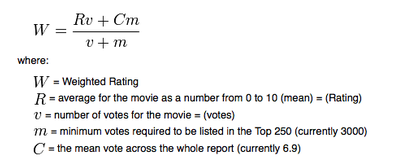

In [13]:
# Calculate according to the above rule
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
m = movies_cleaned_df['vote_count'].quantile(0.70)
C = movies_cleaned_df['vote_average'].mean()

In [14]:
movies_cleaned_df['weighted_average'] = ((R*v) + (C*m))/(v +m)

In [15]:
movies_cleaned_df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627


**Sort the movies according to weighted average**

In [27]:
movie_sorted_ranking = movies_cleaned_df.sort_values('weighted_average', ascending=False)
movie_sorted_ranking[['original_title','vote_average','vote_count', 'weighted_average','popularity']].head(20)

,original_title,vote_average,vote_count,weighted_average,popularity
1881,The Shawshank Redemption,8.5,8205,8.340775,136.747729
3337,The Godfather,8.4,5893,8.192887,143.659698
662,Fight Club,8.3,9413,8.171648,146.757391
3232,Pulp Fiction,8.3,8428,8.157615,121.463076
65,The Dark Knight,8.2,12002,8.102674,187.322927
809,Forrest Gump,8.2,7927,8.056059,138.133331
1818,Schindler's List,8.3,4329,8.038748,104.469351
3865,Whiplash,8.3,4254,8.034695,192.528841
96,Inception,8.1,13752,8.018611,167.583710
1990,The Empire Strikes Back,8.2,5879,8.010426,78.517830


# **Data Visualization**

In [20]:
High_avgweighted_movies = movies_cleaned_df.sort_values('weighted_average', ascending=False)
High_avgweighted_movies[['original_title','''weighted_average',]].head()

,original_title,weighted_average
1881,The Shawshank Redemption,8.340775
3337,The Godfather,8.192887
662,Fight Club,8.171648
3232,Pulp Fiction,8.157615
65,The Dark Knight,8.102674


# **Plot the best movies according to average rating**

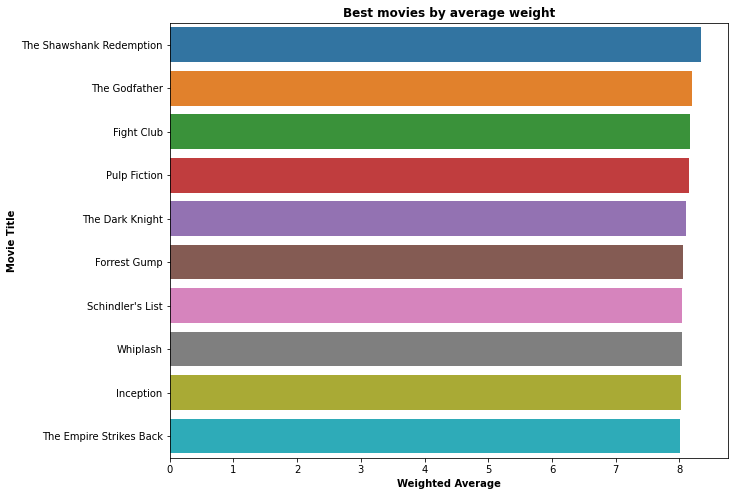

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(y=High_avgweighted_movies['original_title'].head(10), x=High_avgweighted_movies['weighted_average'].head(10),data=High_avgweighted_movies);
plt.title("Best movies by average weight", weight='bold')
plt.xlabel("Weighted Average", weight='bold')
plt.ylabel("Movie Title", weight='bold')
plt.savefig("Best_movies.png")

In [32]:
popularity = High_avgweighted_movies.sort_values('popularity', ascending=False)
popularity[['original_title','vote_average','vote_count','weighted_average','popularity']].head(5)

,original_title,vote_average,vote_count,weighted_average,popularity
546,Minions,6.4,4571,6.365286,875.581305
95,Interstellar,8.1,10867,7.998100,724.247784
788,Deadpool,7.4,10995,7.334360,514.569956
94,Guardians of the Galaxy,7.9,9742,7.798252,481.098624
127,Mad Max: Fury Road,7.2,9427,7.135687,434.278564


# **Plot most popular movies**

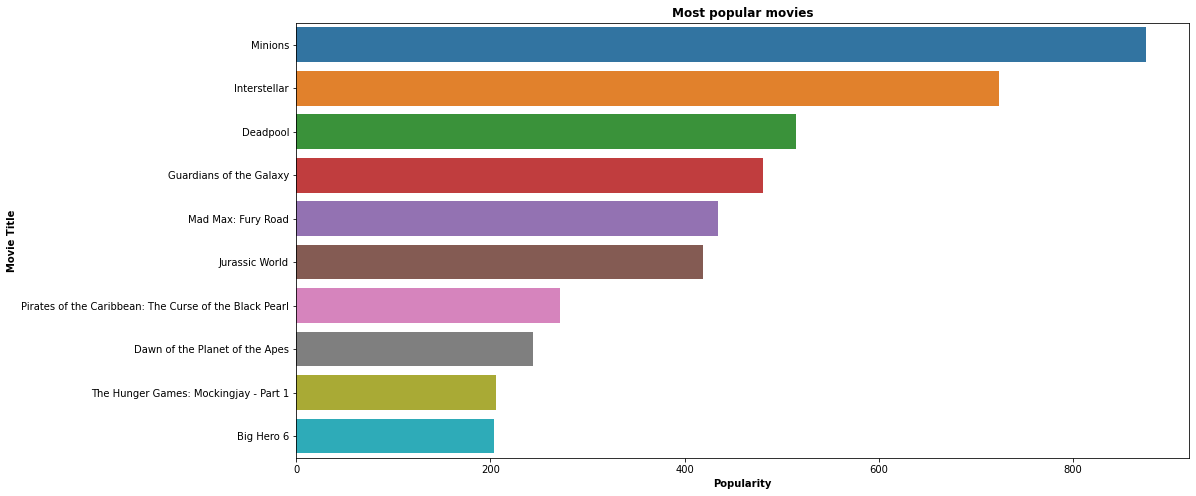

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity);
plt.xlabel('Popularity', weight='bold')
plt.ylabel("Movie Title", weight='bold')
plt.title('Most popular movies', weight='bold')
plt.savefig("Most_popular_movies.png")

# **Recommendations based on scaled weighted_average and popularity (50% priority given to both)**

In [41]:
#  Normalizing the values 
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
movies_scaled_df = scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movies_normalized_df = pd.DataFrame(movies_scaled_df, columns=['weighted_average','popularity'])
movies_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [43]:
movies_cleaned_df[['Normalized_weighted_average', 'Normalized_popularity']] = movies_normalized_df

In [44]:
movies_cleaned_df['score'] = movies_cleaned_df['Normalized_weighted_average'] * 0.5 + movies_cleaned_df['Normalized_popularity']*0.5

In [45]:
movies_cleaned_df[['original_title','vote_average','vote_count', 'weighted_average','popularity', 'Normalized_weighted_average', 'Normalized_popularity', 'score']].head(5)

,original_title,vote_average,vote_count,weighted_average,popularity,Normalized_weighted_average,Normalized_popularity,score
0,Avatar,7.2,11800,7.148013,150.437577,0.674339,0.171815,0.423077
1,Pirates of the Caribbean: At World's End,6.9,4500,6.807627,139.082615,0.581403,0.158846,0.370124
2,Spectre,6.3,4466,6.276075,107.376788,0.436273,0.122635,0.279454
3,The Dark Knight Rises,7.6,9106,7.509565,112.312950,0.773054,0.128272,0.450663
4,John Carter,6.1,2124,6.098319,43.926995,0.387739,0.050169,0.218954


# **Plot best movies based on weighted average and popularity blend**

Text(0, 0.5, 'Movie Title')

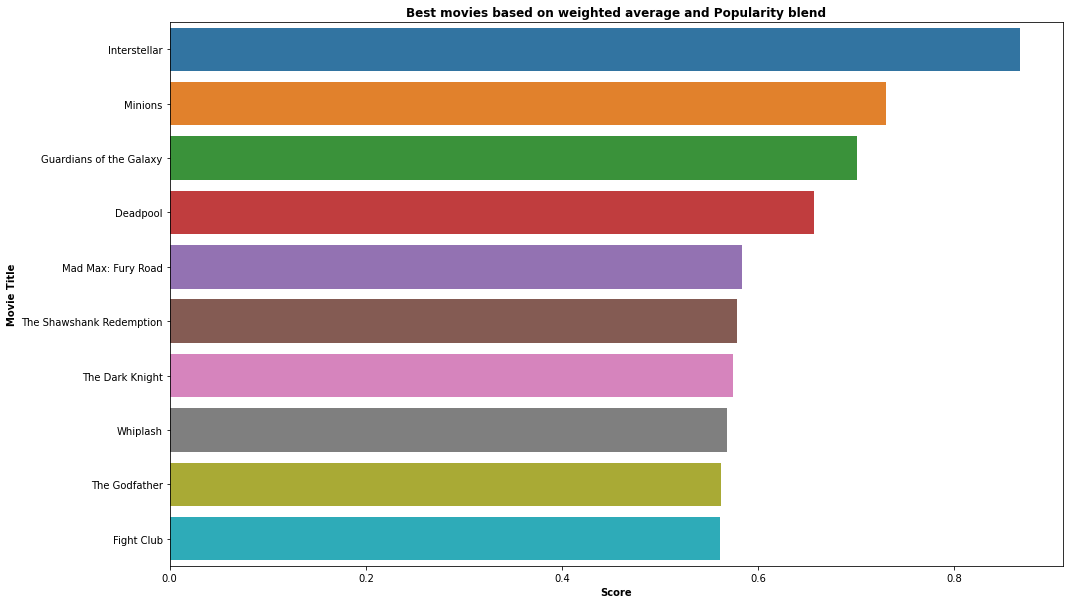

In [51]:
scored_df = movies_cleaned_df.sort_values('score', ascending=False)
plt.figure(figsize=(16,10))
sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df);
plt.title("Best movies based on weighted average and Popularity blend", weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel("Movie Title", weight='bold')